# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

In [2]:
df = pd.read_csv('data/Aemf1.csv')

In [3]:
df.head(10)

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
5,Amsterdam,552.808567,Weekday,Private room,False,True,3.0,False,0,0,8.0,100.0,2,2.131420,1.904668,174.788957,9.255191,225.201662,15.692376
6,Amsterdam,215.124317,Weekday,Private room,False,True,2.0,False,0,0,10.0,94.0,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251
7,Amsterdam,2771.307384,Weekday,Entire home/apt,False,False,4.0,True,0,0,10.0,100.0,3,1.686807,1.458404,208.808109,11.056528,272.313823,18.975219
8,Amsterdam,1001.804420,Weekday,Entire home/apt,False,False,4.0,False,0,0,9.0,96.0,2,3.719141,1.196112,106.226456,5.624761,133.876202,9.328686
9,Amsterdam,276.521454,Weekday,Private room,False,True,2.0,False,1,0,10.0,88.0,1,3.142361,0.924404,206.252862,10.921226,238.291258,16.604478


In [4]:
df.isna().sum()

City                           0
Price                          0
Day                            0
Room Type                      0
Shared Room                    0
Private Room                   0
Person Capacity                0
Superhost                      0
Multiple Rooms                 0
Business                       0
Cleanliness Rating             0
Guest Satisfaction             0
Bedrooms                       0
City Center (km)               0
Metro Distance (km)            0
Attraction Index               0
Normalised Attraction Index    0
Restraunt Index                0
Normalised Restraunt Index     0
dtype: int64

The dataset we are working with is a cleaned Europe dataset that doesn't have any missing data (NA values). However, we should still check for any potential outliers that could affect our model's performance.

First, let's plot a histogram to show the frequency distribution of the prices:

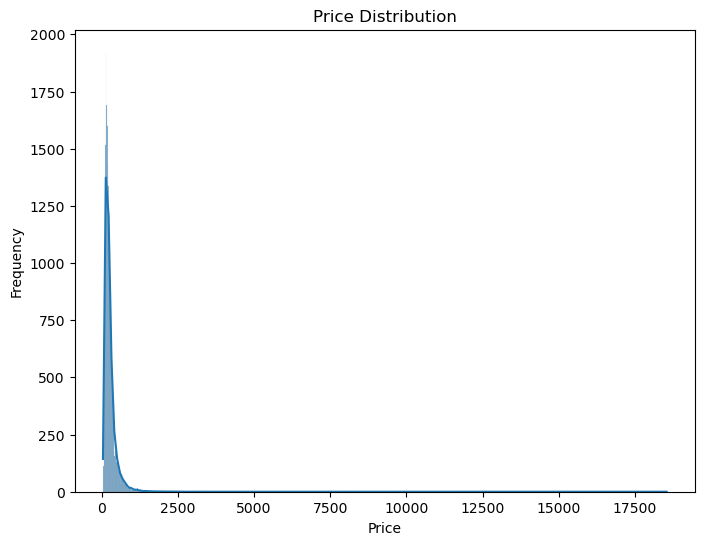

In [5]:
# Histogram for price distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.savefig('figures/price_distribution_before.png', dpi=300, bbox_inches='tight')
plt.show()

From the histogram, we can observe that there seem to be outliers in the price distribution. To address this issue, we will remove the outliers based on the Interquartile Range (IQR) method. Here's the code to perform this operation:

In [6]:
price_summary = df['Price'].describe()
print(price_summary)
price_summary.to_csv('results/price_summary.csv')

count    41714.000000
mean       260.094423
std        279.408493
min         34.779339
25%        144.016085
50%        203.819274
75%        297.373358
max      18545.450285
Name: Price, dtype: float64


After removing the outliers, we will save the filtered dataset to a filtered CSV file:

In [7]:
# Remove outliers based on Price
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_data = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]
filtered_data.to_csv('data/filtered_data.csv', index=False)

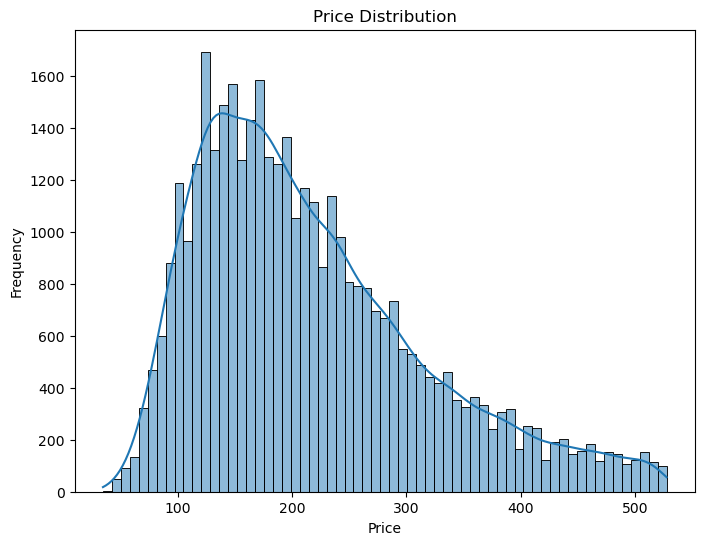

In [8]:
# Histogram for price distribution
plt.figure(figsize=(8, 6))
sns.histplot(filtered_data['Price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.savefig('figures/price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

With the outliers removed, our dataset is now ready for further analysis and model building.


/tmp/ipykernel_3674/1166516350.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = filtered_data.corr()


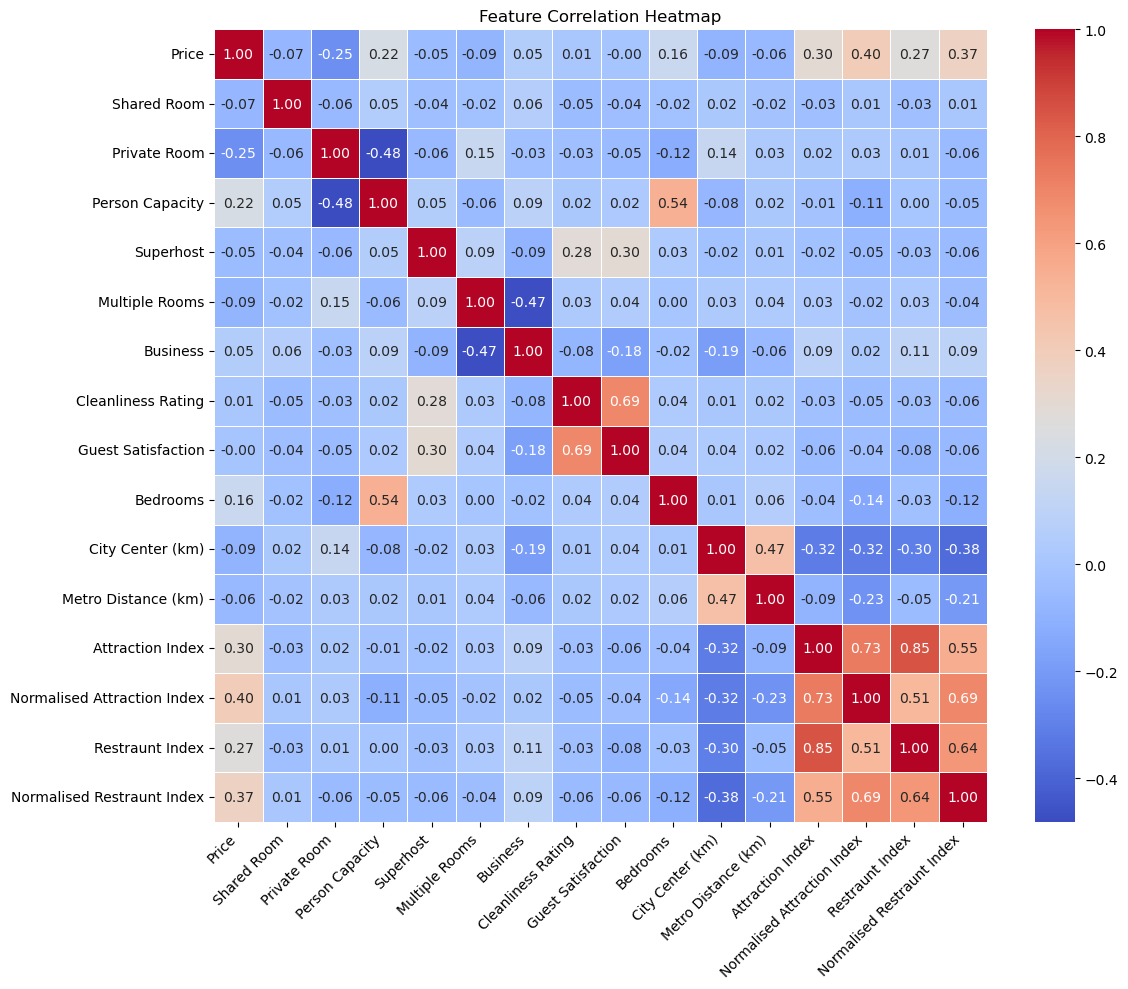

In [9]:
# Calculate the correlation matrix
corr_matrix = filtered_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Customize the plot
plt.title('Feature Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the figure
plt.savefig('figures/feature_correlation_heatmap.png', bbox_inches='tight')

# Show the plot
plt.show()


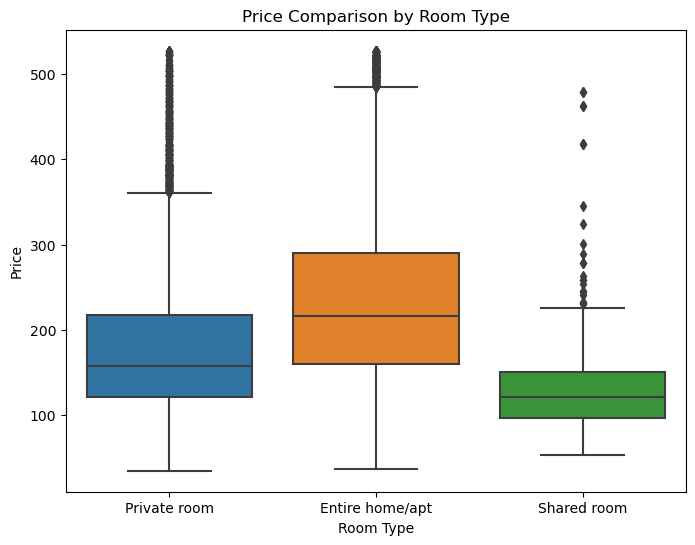

In [10]:
# Boxplot for comparing room types
plt.figure(figsize=(8, 6))
sns.boxplot(x='Room Type', y='Price', data=filtered_data)
plt.title('Price Comparison by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.savefig('figures/price_comparison_by_room_type', bbox_inches='tight')
plt.show()

In [11]:
filtered_data['Room Type'].value_counts()

Entire home/apt    25728
Private room       12781
Shared room          314
Name: Room Type, dtype: int64

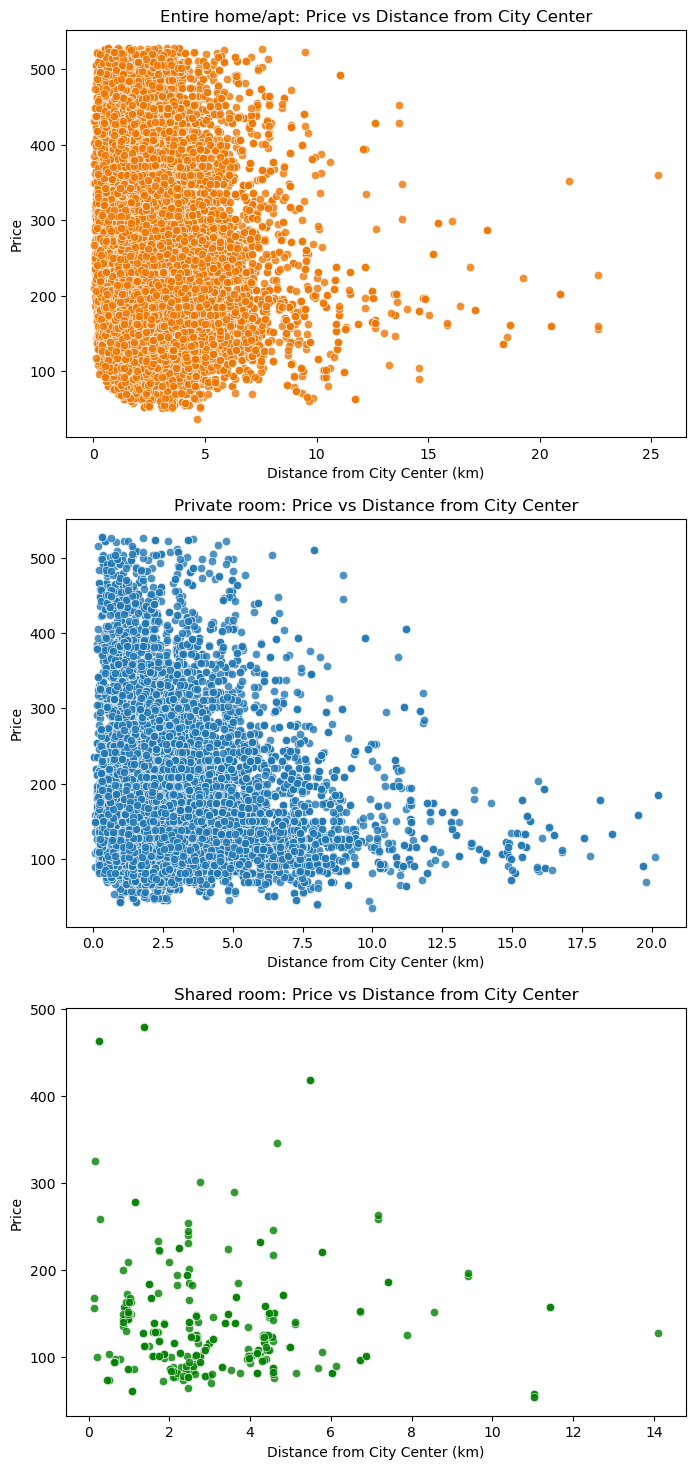

In [12]:
# Filter data by room type
entire_home = filtered_data[filtered_data['Room Type'] == 'Entire home/apt']
private_room = filtered_data[filtered_data['Room Type'] == 'Private room']
shared_room = filtered_data[filtered_data['Room Type'] == 'Shared room']

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 18))

# Entire home/apt
sns.scatterplot(x='City Center (km)', 
                y='Price', 
                data=entire_home, 
                ax=axes[0], alpha=0.8, 
                color = "#ee7600"
               )
axes[0].set_title('Entire home/apt: Price vs Distance from City Center')
axes[0].set_xlabel('Distance from City Center (km)')
axes[0].set_ylabel('Price')

# Private room
sns.scatterplot(x='City Center (km)', 
                y='Price', 
                data=private_room, 
                ax=axes[1], 
                alpha=0.8
               )
axes[1].set_title('Private room: Price vs Distance from City Center')
axes[1].set_xlabel('Distance from City Center (km)')
axes[1].set_ylabel('Price')

# Shared room
sns.scatterplot(x='City Center (km)', 
                y='Price', 
                data=shared_room, 
                ax=axes[2], 
                alpha=0.8,
                color = "green"
               )
axes[2].set_title('Shared room: Price vs Distance from City Center')
axes[2].set_xlabel('Distance from City Center (km)')
axes[2].set_ylabel('Price')

# Save the figure before showing it
plt.savefig('figures/price_vs_distance_from_city_center_by_room_type.png', dpi=300, bbox_inches='tight')

plt.show()


In [13]:
city_stats = filtered_data.groupby('City')['Price'].agg(['mean', 'median'])

# Convert city names to numerical values
city_labels = filtered_data['City'].astype('category').cat.codes

# Calculate the correlation between city and price
city_price_corr = pd.DataFrame({'City': city_labels, 'Price': filtered_data['Price']}).corr(method='pearson').iloc[0, 1]

print("Correlation between city and price:", city_price_corr)
print(city_stats)
if not os.path.exists('result'):
    os.makedirs('result')

# Save city_stats DataFrame to a CSV file in the 'result' folder
city_stats.to_csv('results/city_stats.csv')

Correlation between city and price: 0.10361768269037437
                 mean      median
City                             
Amsterdam  354.109178  356.197127
Athens     144.354423  127.715417
Barcelona  227.110980  196.895292
Berlin     211.988194  185.566047
Budapest   167.491323  152.277107
Lisbon     230.253192  223.030019
Paris      299.216175  287.305434
Rome       197.229417  182.124237
Vienna     221.750960  206.390389


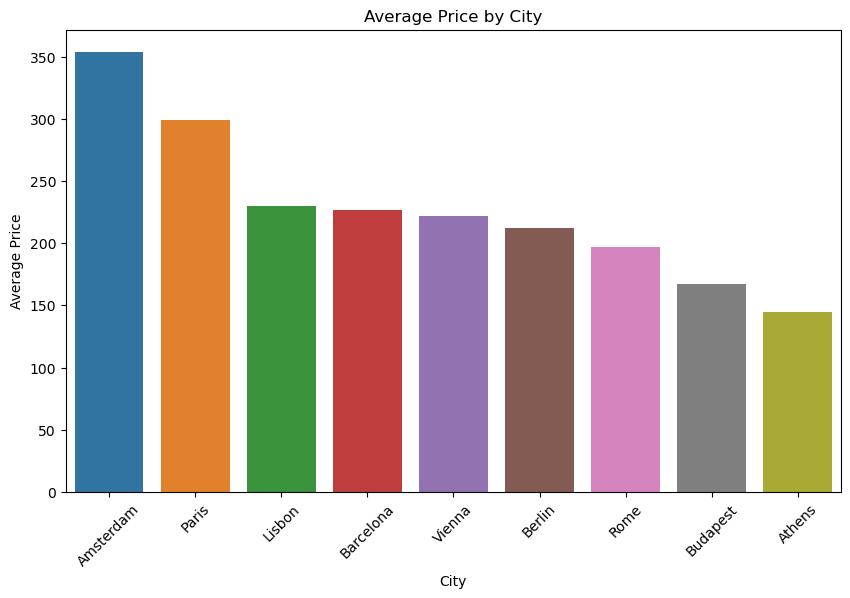

In [14]:
# Calculate the average price for each city
city_price = filtered_data.groupby('City')['Price'].mean().sort_values(ascending=False)

# Create a bar plot to visualize the relationship between city and price
plt.figure(figsize=(10, 6))
sns.barplot(x=city_price.index, y=city_price.values)
plt.title('Average Price by City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.savefig('figures/average_price_by_city.png', bbox_inches='tight')
plt.show()

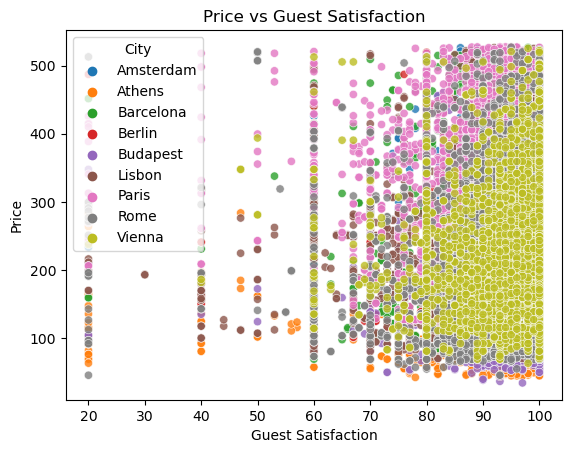

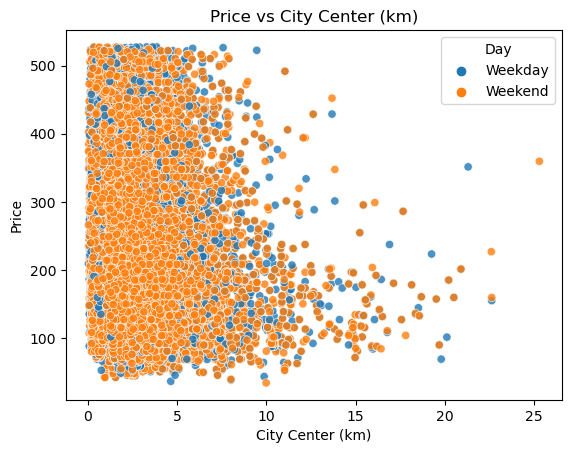

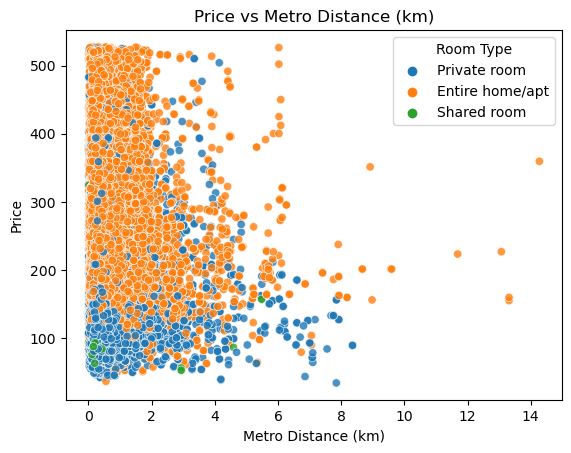

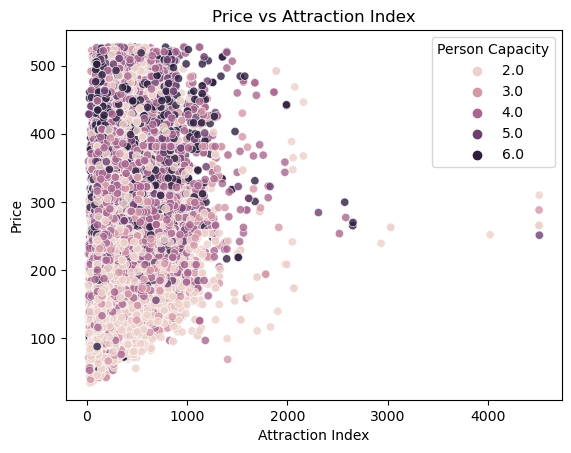

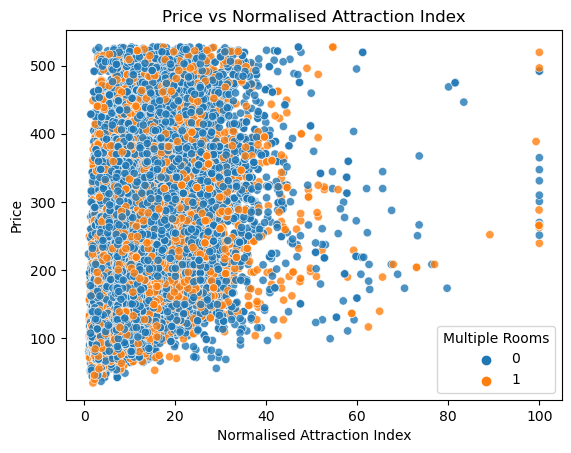

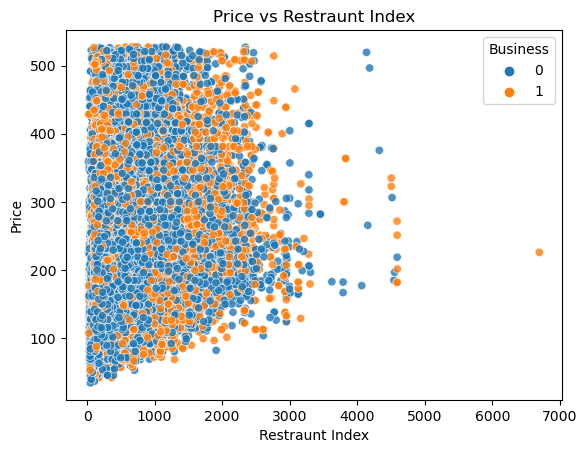

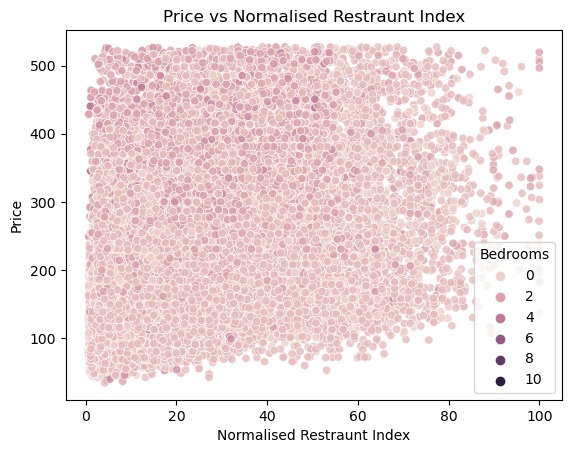

In [15]:
label=['City', 'Day', 'Room Type',
       'Person Capacity', 'Multiple Rooms', 'Business',
       'Bedrooms']

x_vars = ['Guest Satisfaction','City Center (km)', 'Metro Distance (km)', 
          'Attraction Index', 'Normalised Attraction Index', 
          'Restraunt Index', 'Normalised Restraunt Index']
y_var = 'Price'

# Loop through the x variables and create a separate plot for each
for i, x_var in enumerate(x_vars):
    plt.figure(i)
    sns.scatterplot(x=filtered_data[x_var], y=filtered_data[y_var], alpha=0.8, hue=filtered_data[label[i]])
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title(f'{y_var} vs {x_var}')
    plt.savefig(f'figures/{y_var}_vs_{x_var}.png', dpi=300, bbox_inches='tight')
plt.show()